#Problem & Dataset Description
Il problema da noi scelto riguarda la previsione del livello di obesità di alcuni individui sulla base delle loro abitudini alimentari e del loro livello di attività fisica. L'obiettivo è quindi quello di creare un modello di classificazione abbastanza preciso per i nostri dati e confrontare le prestazioni di diversi classificatori.

Il dataset in questione riguarda uno studio fatto su persone provenienti da Messico, Perù e Colombia. Contiene 17 attributi e 2111 record. I dati sono stati ottenuti da un sondaggio reperibile al seguente link: https://www.sciencedirect.com/science/article/pii/S2352340919306985#bib1

Di seguito sono elencati i vari attributi e il loro significato.

Attributo | Significato|Valori
----------|------------|------
Gender | Sesso della persona| Male/Female
Age | Età della persona|Numerico
Height | Altezza della persona|Numerico
Weight | Peso della persona|Numerico
family_history_with_overweight | Sono presenti casi di obesità pregressee nella famiglia | Yes/No
FAVC | Frequente assunzione di cibo altamente calorico | Yes/No
FCVC | Frequenza di assunzione di vegetali | Numerico
NCP | Numero di pasti principali | Numerico
CAEC | Assunzione di cibo tra i pasti | Categorico
SMOKE | Persona fumatrice | Yes/No
CH2O | Assunzione giornaliera di acqua | Numerico
SCC | La persona monitora la quantità di calorie assunte | Yes/No
FAF | Frequenza di attività fisica | Numerico
TUE | Tempo di utilizzo di dispositivi tecnologici | Numerico
CALC | Assunzione giornaliera di alcool | Categorico
MTRANS | Trasporto utilizzato | Vario


Per quanto riguarda i valori categorici viene utilizzata la seguente scala:
1. No
2. Sometimes
3. Frequently
4. Always

Infine, è presente un'ultimo attributo `NObeyesdad` che rappresenta il livello di obesità della persona e quindi il target del nostro problema di classificazione. Esso può avere i seguenti valori:

1. Insufficient_Weight
2. Normal_Weight
3. Overweight_Level_I
4. Overweight_Level_II
5. Obesity_Type_I
6. Obesity_Type_II
7. Obesity_Type_III






# Imports & Costants


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Come prima cosa importiamo il nostro dataset e definiamo un `RANDOM_STATE` per far sì che i risultati siano deterministici

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from io import StringIO
RANDOM_STATE = 6666
DATA_PATH = "https://raw.githubusercontent.com/Cippy99/Obesity-Level---MLDM-Project/main/ObesityDataSet_raw_and_data_sinthetic.csv"


# Retrieve Dataset

In [ ]:
dataset = pd.read_csv(DATA_PATH)
levels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
dataset["NObeyesdad"] = pd.Categorical(dataset["NObeyesdad"], levels)
dataset

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

#Data Preprocessing

I dati ottenuti dal sondaggio sono già stati preprocessati per eliminare i missing values e fare in modo che fossero distribuiti i modo equo in base alla classe. Pertanto non è stato necessario effettuare alcuna attività in questa fase e ci limitiamo a mostrare i risultati.

Come attività di preprocessing abbiamo comunque dovuto trasformare i dati per sostituire valori testuali con numerici e togliere le features non utilizzabili.



##Missing Values

Controlliamo se nel nostro dataset sono presenti missing values

In [ ]:
def count_missing(ds: pd.DataFrame):
    return ds.shape[0] - ds.count()

In [ ]:
count_missing(dataset)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Il nostro dataset non presenta alcun missing value, pertanto possiamo utilizzare tutti i 2111 record.

Controlliamo anche la distribuzione dei record in base alla loro classe

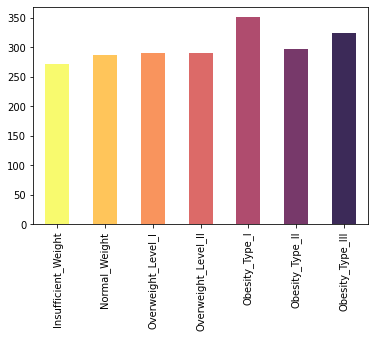

In [ ]:
colors = ["#f8fa6e", "#ffc55a", "#f9945d", "#dc6a68", "#af4c6e", "#77396a", "#3c2a58"]
data = dataset.sort_values('NObeyesdad')['NObeyesdad'].value_counts().reindex(levels)
data.plot(kind='bar', color = colors)

Come notiamo, vi è una leggera maggioranza di record di classe `Obesity_Type_I`, ma a parte ciò i dati sono divisi abbastanza equamente tra le varie classi. Pertanto non riteniamo opportuno dover effettuare un'attività di preprocessing per riequilibrare la distribuzione dei record

##Transform categorical value to numeric

Dato che i classificatori lavorano con dati numerici, è necessario trasformare i valori testuali in numeri. Abbiamo effettuato le seguenti trasformazioni utilizzando un `OrdinalEncoder`:
> Gender:
 0. Male
 1. Female

>family_history_with_overweight, FAVC, SMOKE, SCC:
 0. No
 1. Yes

> CAEC, CALC:
  1. No
  2. Sometimes
  3. Frequently
  4. Always

Anche l'attributo di classe è stato reso numerico secondo la scala indicata precedentemente

In [ ]:
from pandas.core.frame import Frequency
from sklearn.preprocessing import OrdinalEncoder
genders = ['Male', 'Female']
yes_or_no = ['no', 'yes']
frequency = ['no', 'Sometimes', 'Frequently', 'Always']
columns_to_order = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'NObeyesdad']

categories = [genders, yes_or_no, yes_or_no, frequency, yes_or_no, yes_or_no, frequency, levels]

dataset_proc = dataset.copy()

encoder = OrdinalEncoder(categories=categories, dtype=int)
encoder.fit(dataset_proc[columns_to_order])
dataset_proc[columns_to_order] = encoder.transform(dataset_proc[columns_to_order])

dataset_proc

Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2          0  23.000000  1.800000   77.000000                               1   
3          0  27.000000  1.800000   87.000000                               0   
4          0  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  133.346641                               1   
2110       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     1      0  2.000000    0  0.000000  1.000000     0   
1        0   3.0  3.0     1      1  3.000000    1  3.000000  0.000000     1   
2        0   2.0  3.0     1      0  2.000000    0  2.000000  1.000000     2   
3        0   3.0  3.0     1      0  2.000000    0  2.000000  0.000000     2   
4        0   2.0  1.0     1      0  2.000000    0  0.000000  0.000000     1   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     1      0  1.728139    0  1.676269  0.906247     1   
2107     1   3.0  3.0     1      0  2.005130    0  1.341390  0.599270     1   
2108     1   3.0  3.0     1      0  2.054193    0  1.414209  0.646288     1   
2109     1   3.0  3.0     1      0  2.852339    0  1.139107  0.586035     1   
2110     1   3.0  3.0     1      0  2.863513    0  1.026452  0.714137     1   

                     MTRANS  NObeyesdad  
0     Public_Transportation           1  
1     Public_Transportation           1  
2     Public_Transportation           1  
3                   Walking           2  
4     Public_Transportation           3  
...                     ...         ...  
2106  Public_Transportation           6  
2107  Public_Transportation           6  
2108  Public_Transportation           6  
2109  Public_Transportation           6  
2110  Public_Transportation           6  

[2111 rows x 17 columns]

##Divide dataset in training and testing

Per la nostra analisi è necessario suddividere il dataset in training e testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X, y = dataset_proc.drop(columns="NObeyesdad"), dataset_proc["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

#Drop non categorical column
X_train_drop = X_train.drop(columns='MTRANS')
X_test_drop = X_test.drop(columns='MTRANS')

COLUMN_NAMES = X_train_drop.columns

Abbiamo riservato $\frac{3}{4}$ dei record per il training e $\frac{1}{4}$ per il testing. Abbiamo inoltre eliminato l'attributo `MTRANS` in quanto non essendo categorico non è possibile trasformarlo in numerico

#Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

##Simple Tree

Come prima cosa abbiamo utilizzato un `DecisionTreeClassifier` con profondità 4 per avere un'idea di come venissero classificati i record.

Score: 0.7803030303030303


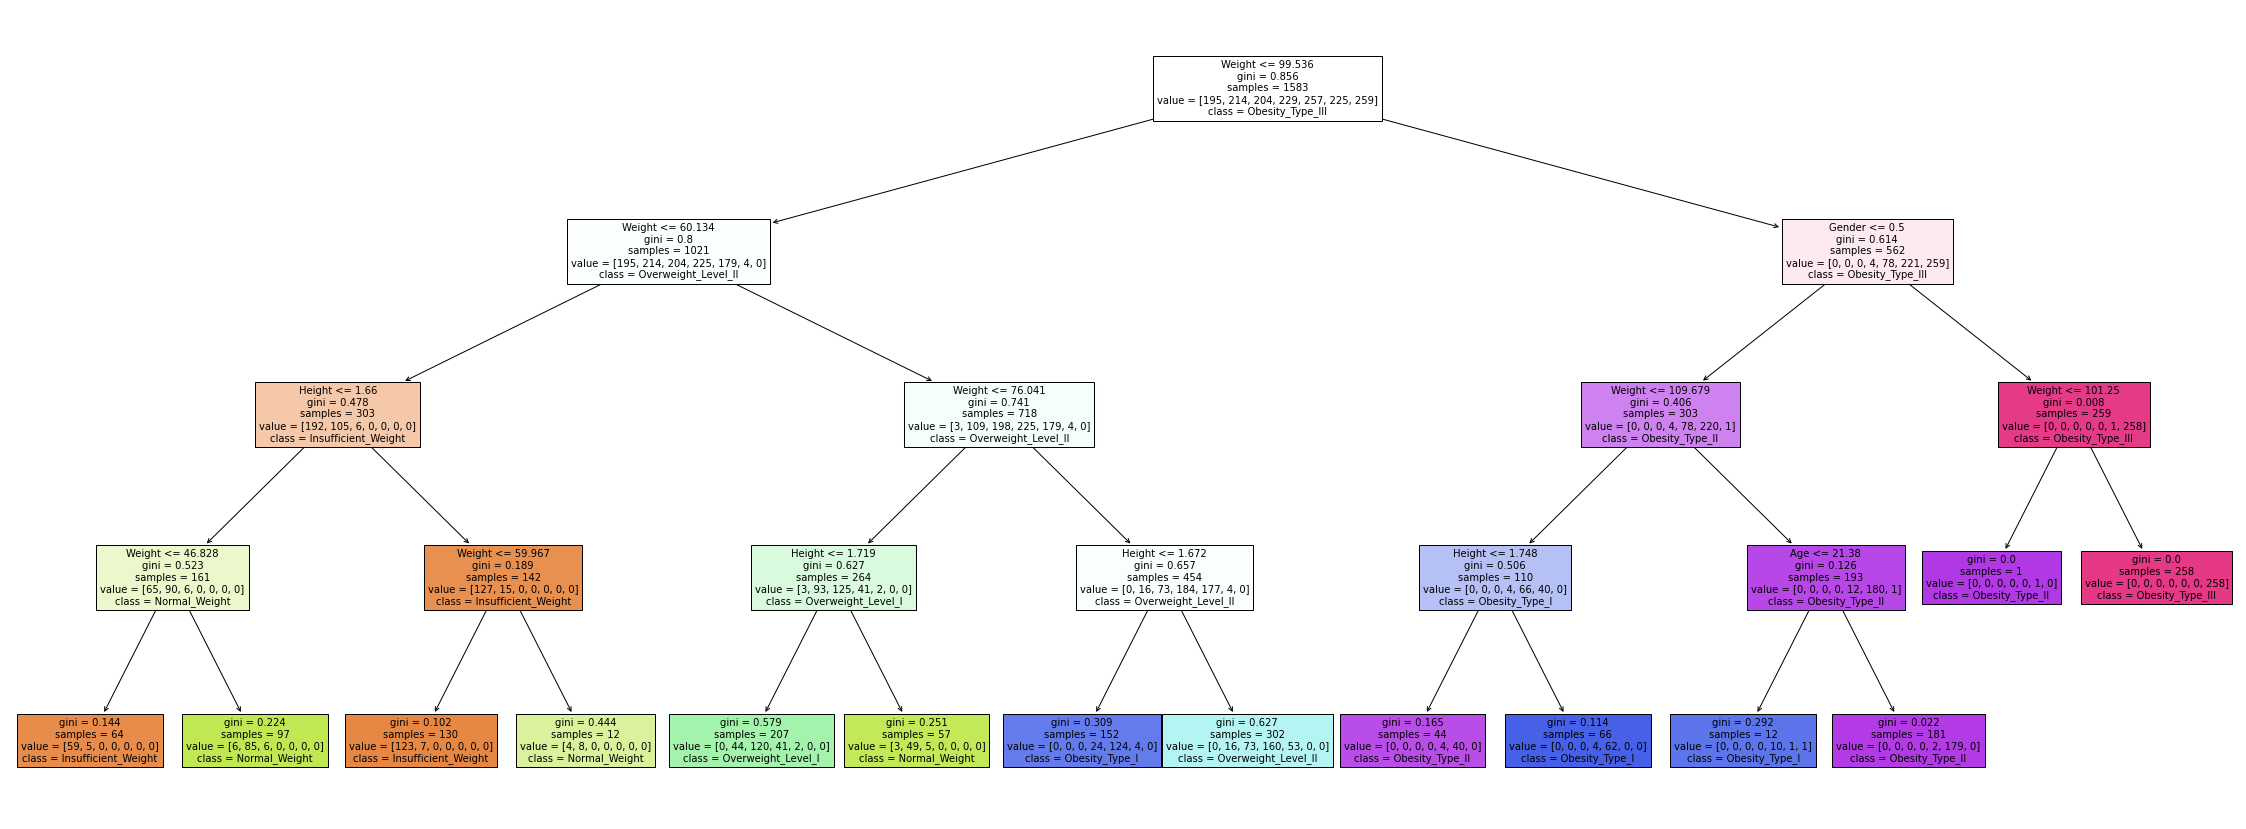

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=4)
tree_classifier.fit(X_train_drop, y_train)

print(f'Score: {tree_classifier.score(X_test_drop, y_test)}')

plt.figure(figsize=(40,15))
_ = plot_tree(tree_classifier, feature_names=dataset.columns, class_names = levels, filled=True, fontsize=10)

Ovviamente lo score sul testing è notevolmente basso e si arresta intorno al 78%.

##Using Grid Search

Per aumentare lo score dell'albero di decisione abbiamo utilizzato una `GridSearchCV` per calcolarene i parametri migliori.

In [ ]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(4, 12),
                  'max_features': ['sqrt', 'log2', None]}

scoring = ['accuracy', 'balanced_accuracy', 'f1']

dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)

grid_search = GridSearchCV(estimator=dtc, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

best_decision_tree = grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best score: 0.9551349414855504
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'splitter': 'best'}


Utilizzando una 10-fold cross validation si ottiene uno score del 95.51%.

###Training

Di seguito abbiamo mostrato l'albero completo con i parametri migliori dati dalla grid search.

In [ ]:
best_decision_tree.fit(X_train_drop, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=6666)

In [ ]:
plt.figure(figsize=(100,40), dpi=300)
_ = plot_tree(best_decision_tree, feature_names=dataset.columns, class_names=levels, filled=True, fontsize=10)

In [ ]:
best_decision_tree.score(X_test_drop, y_test)

0.9318181818181818

Il nostro albero di decisione migliore ha uno score del 93.18% sui dati di testing.

###Confusion Matrix

Tramite la matrice di confusione si vede che la classificazione è abbastanza precisa

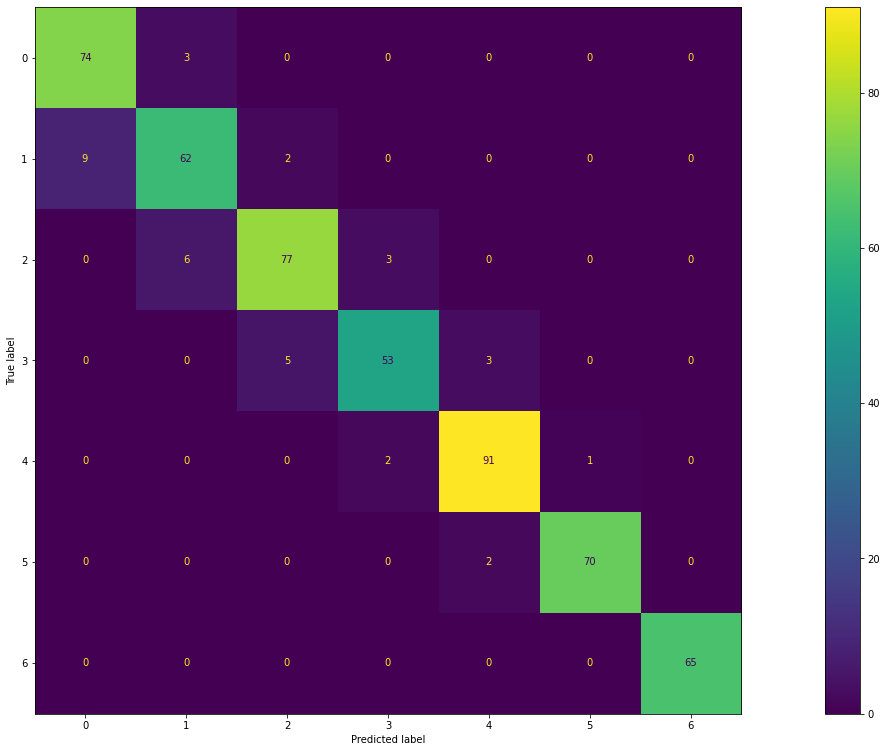

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(30,13))
ConfusionMatrixDisplay.from_estimator(best_decision_tree, X_test_drop, y_test, ax=ax)


Si nota che l'albero di decisione misclassifica sempre al massimo di 1 livello, ad esempio 9 record di classe 1 (Normal Weight) vengono classificati come classe 0 (Insufficient Weight). Inoltre tende a dare un valore di classe minore (24 record) piuttosto che maggiore (12 record).

###Possible Overfitting

Abbiamo anche voluto verificare la possibile presenza di overfitting., in quanto variando la profondità dell'albero di decisione notavamo risultati molto simili.

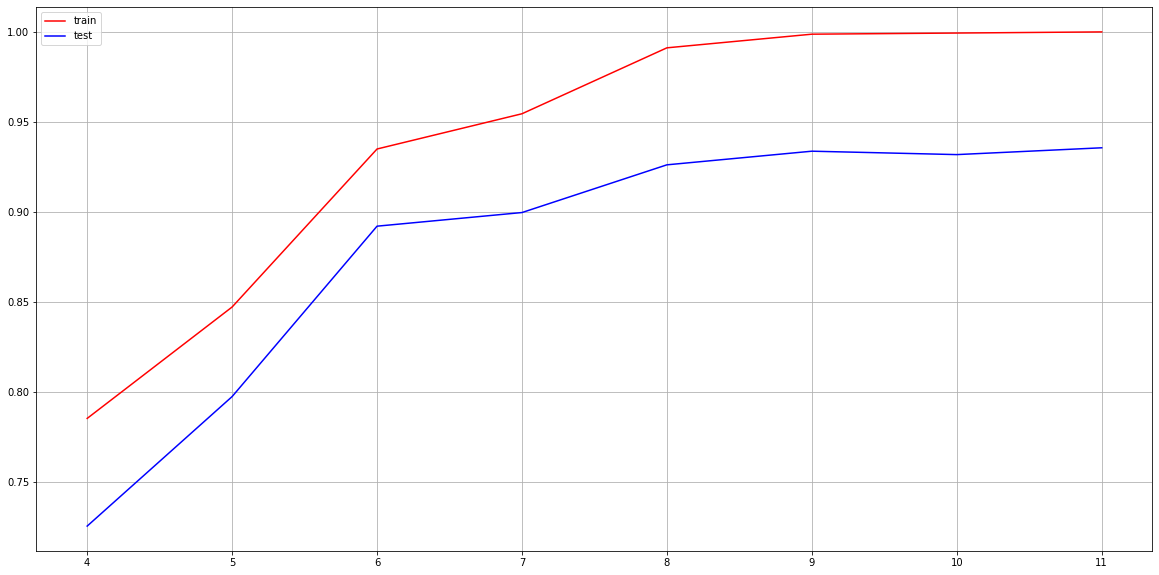

In [ ]:
scores_train=[]
scores_test=[]
depths = range(4,12)

for i in depths:
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=None, splitter='best', random_state=RANDOM_STATE)
  dtc.fit(X_train_drop, y_train)
  scores_train.append(dtc.score(X_train_drop, y_train))
  scores_test.append(dtc.score(X_test_drop, y_test))

fig = plt.figure(figsize=(20,10))

plt.plot(depths, scores_train, 'r-', label='train')
plt.plot(depths, scores_test, 'b-', label='test')
plt.grid()
plt.legend()
plt.show()

Dal grafico si nota che non è presente overfitting, ma, dopo il livello 9, non ha molto senso andare avanti a diramare perchè la precisione resta abbastanza costante.

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=None, splitter='best', random_state=RANDOM_STATE)
dtc.fit(X_train_drop, y_train)
dtc.score(X_test_drop, y_test)

0.9337121212121212

A conferma della nostra ipotesi, lo score dell'albero con profondità 9 sul dataset di testing è pari a 93.37%, addirittura di poco maggiore del risultato precedente.

###Feature Importance

Di seguito abbiamo mostrato l'importanza delle varie features.

In [ ]:
feature_importances = pd.DataFrame(
    best_decision_tree.feature_importances_, index=COLUMN_NAMES, columns=["importance"]
).sort_values("importance", ascending=False)
feature_importances

importance
Weight                            0.596801
Height                            0.200221
Gender                            0.127136
Age                               0.022965
FAVC                              0.014435
CH2O                              0.011057
FCVC                              0.010176
NCP                               0.007685
TUE                               0.004987
CAEC                              0.001875
family_history_with_overweight    0.001589
CALC                              0.001073
SMOKE                             0.000000
SCC                               0.000000
FAF                               0.000000

Come ci aspettavam il peso è la feature più importante nella stima del livello di obesità. Al secondo posto vi è l'altezza, e anch'essa non ci sorprende visto che è l'altro fattore che interviene nel calcolo del BMI.

# Support Vector Machines

Abbiamo poi deciso di utilizzare le Support Vector Machines. L'analisi è stata fatta utilizzando un kernel lineare, polinomiale e gaussiano. Anche qui abbiamo utilizzato una grid search per trovare i parametri migliori.

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

##Using LDA

Come prima analisi abbiamo deciso di utilizzare la tecnica di analisi discriminante lineare per ridurre il numero delle features da 16 a 2, in modo da poter avere una rappresentazione grafica dei record e dei decision boundaries creati dalle SVM

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda2 = LinearDiscriminantAnalysis(n_components=2)
lda2.fit(X_train_drop, y_train)
X_lda_train = lda2.transform(X_train_drop)
X_lda_test = lda2.transform(X_test_drop)

In [ ]:
parameter_grid = {'C': [10**i for i in range (1,4)],
                  'kernel': ['linear', 'poly', 'rbf'],
                  'gamma': ['scale', 'auto']}
scoring = ['accuracy', 'balanced_accuracy', 'f1']

svc = SVC(random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=svc, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_lda_train, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.929870233261683
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
best_lda_svc = SVC(random_state=RANDOM_STATE, C=100, kernel='rbf', gamma='scale')
clf= best_lda_svc.fit(X_lda_train, y_train)

best_lda_svc.score(X_lda_test, y_test)

0.9375

Notiamo che lo score è abbastanza elevato, nonostante la riduzione delle features.

Disegnamo quindi il grafico dei decision boundaries con i dati di training e testing.

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

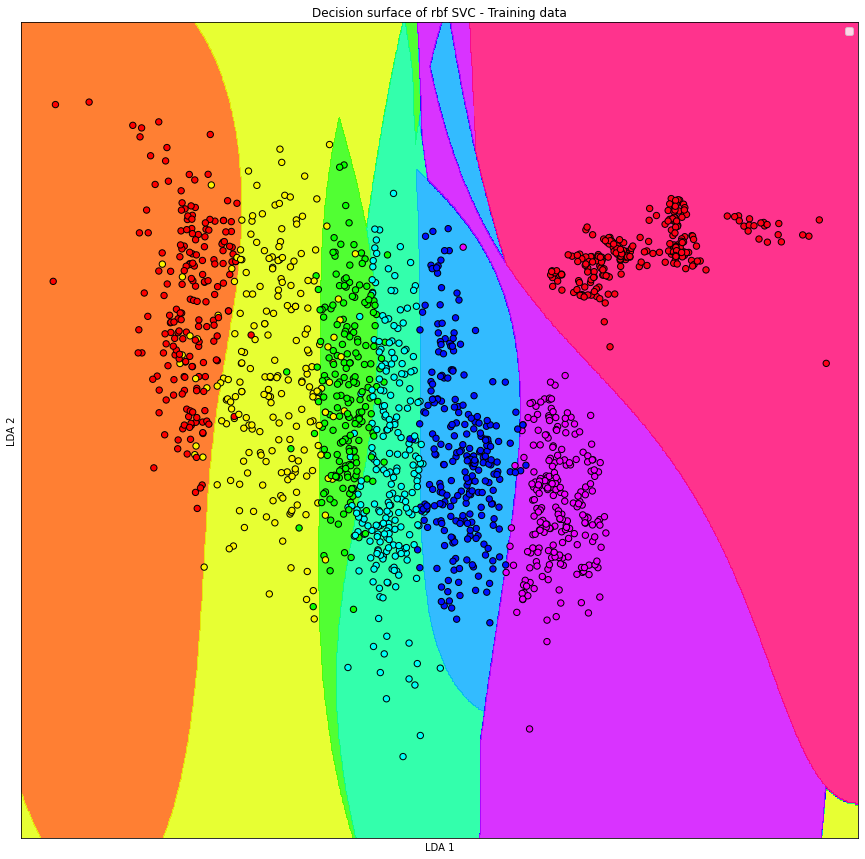

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# title for the plots
title = ('Decision surface of rbf SVC - Training data')
# Set-up grid for plotting.
X0, X1 = X_lda_train[:, 0], X_lda_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.hsv, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.hsv, s=40, edgecolors='k')
ax.set_ylabel('LDA 2')
ax.set_xlabel('LDA 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

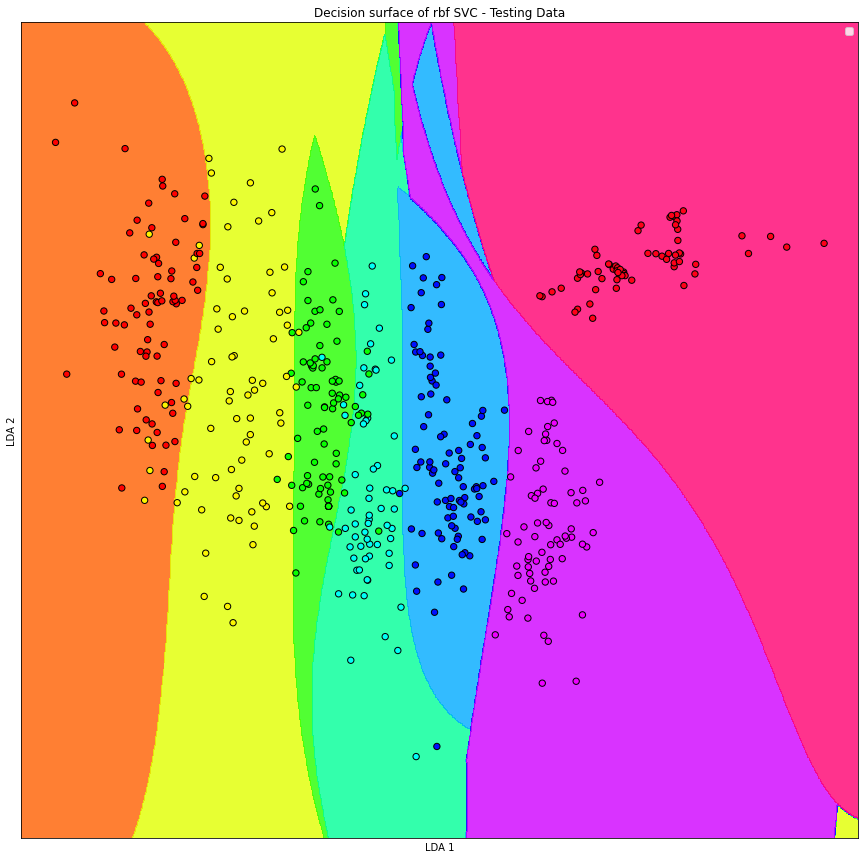

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
# title for the plots
title = ('Decision surface of rbf SVC - Testing Data')
# Set-up grid for plotting.
X0, X1 = X_lda_test[:, 0], X_lda_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.hsv, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.hsv, s=40, edgecolors='k')
ax.set_ylabel('LDA 2')
ax.set_xlabel('LDA 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

##Linear kernel

In [ ]:
parameter_grid = {'C': [10**i for i in range (1,5)],
                  'kernel': ['linear']}
scoring = ['accuracy', 'balanced_accuracy', 'f1']

svc = SVC(random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=svc, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best score: 0.9665353076984318
Best parameters: {'C': 1000, 'kernel': 'linear'}


In [ ]:
best_linear_svc = SVC(random_state=RANDOM_STATE, C=1000, kernel='linear')
best_linear_svc.fit(X_train_drop, y_train)

best_linear_svc.score(X_test_drop, y_test)

0.946969696969697

Il kernel lineare ci da uno score del 94.7% sul testing. Utilizzando tutte le features si riesce ad ottenere un risultato leggermente maggiore rispetto all'utilizzo di LDA.


##Polynomial kernel

In [ ]:
parameter_grid = {'C': [1000],
                  'kernel': ['poly'],
                  'degree': range(2,6),
                  'gamma': ['scale', 'auto']}
scoring = ['accuracy', 'balanced_accuracy', 'f1']

svc = SVC(random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=svc, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.9545139718175305
Best parameters: {'C': 1000, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
best_poly_svc = SVC(random_state=RANDOM_STATE, C=1000, kernel='poly', degree=2, gamma='auto')
best_poly_svc.fit(X_train_drop, y_train)

best_poly_svc.score(X_test_drop, y_test)

0.946969696969697

Il kernel polinomiale di grado 2 fornisce lo stesso risultato del kernel lineare.

##RBF kernel

In [ ]:
parameter_grid = {'C': [10**i for i in range (1,5)],
                  'kernel': ['rbf'],
                  'gamma': ['scale', 'auto']}
scoring = ['accuracy', 'balanced_accuracy', 'f1']

svc = SVC(random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=svc, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best score: 0.9178966642783217
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_rbf_svc = SVC(random_state=RANDOM_STATE, C=10, kernel='rbf', gamma='auto')
best_rbf_svc.fit(X_train_drop, y_train)

best_rbf_svc.score(X_test_drop, y_test)

0.9223484848484849

Il kernel gaussiano invece fornisce risultati peggiori, fermandosi solo a 92.23%

#K-Neighbors

Abbiamo utilizzato anche un `KNeighborsClassifier` per la classificazione.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameter_grid = {'n_neighbors': range(1,11),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto'],
                  'p': [1,2,3]}
scoring = ['accuracy', 'balanced_accuracy', 'f1']

kn = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator=kn, param_grid=parameter_grid, cv=15, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 15 folds for each of 60 candidates, totalling 900 fits
Best score: 0.9304941599281222
Best parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
best_kn = KNeighborsClassifier(n_jobs=-1, algorithm='auto', n_neighbors=1, p=1, weights='uniform')
best_kn.fit(X_train_drop, y_train)

best_kn.score(X_test_drop, y_test)

0.9261363636363636

Lo score risulta inferiore ai risultati precedenti ed è pari a 92.61%

#Ensemble Methods

Abbiamo applicato anche degli Ensemble Methods, tra cui Random Forest, Extra Trees, Voting Classifier e Adaboost.

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
parameter_grid = {'max_depth': range(5,12),
                  'criterion': ['gini', 'entropy'],
                  'bootstrap': [True, False],
                  }
scoring = ['accuracy', 'balanced_accuracy', 'f1']

rand_forest = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=rand_forest, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best score: 0.9519982485470901
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10}


In [ ]:
best_rf = RandomForestClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=10, bootstrap=False, n_estimators=100)
best_rf.fit(X_train_drop, y_train)

best_rf.score(X_test_drop, y_test)

0.9450757575757576

Il `RandomForestClassifier` dà uno score sul testing del 94.51%

##Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
parameter_grid = {'max_depth': range(5,12),
                  'criterion': ['gini', 'entropy'],
                  'bootstrap': [True],
                  'oob_score':[True,False],
                  }
scoring = ['accuracy', 'balanced_accuracy', 'f1']

ex_tree = ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
grid_search = GridSearchCV(estimator=ex_tree, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best score: 0.9052583393041955
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'oob_score': True}


In [ ]:
best_ext = ExtraTreesClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=11, bootstrap=True, oob_score=True, n_estimators=100)
best_ext.fit(X_train_drop, y_train)

best_ext.score(X_test_drop, y_test)

0.9204545454545454

L'`ExtraTreeClassifier` risulta peggiore, con uno score del 92.05%

##Voting Classifier

Nel `VotingClassifier` abbiamo usato come classificatori il decision tree, k-neighbors e l'svc lineare.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
best_voting_clf = VotingClassifier(estimators=[('tree', best_decision_tree), ('kn', best_kn), ('svc', best_linear_svc)], voting='hard')
best_voting_clf.fit(X_train_drop, y_train)

best_voting_clf.score(X_test_drop, y_test)

0.9659090909090909

Classificatore|Score
--------------|-----
DecisionTreeClassifier|93.18%
KNeighborsClassifier|92.61%
SVC|94.7%
VotingClassifier|96.59%

Come previsto, lo score è molto più alto dei singoli classificatori.

##Adaboost

Come ultimo classificatore abbiamo utilizzato AdaBoost, utilizzando come classificatore di base l'albero di decisione.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
parameter_grid = {'base_estimator': [DecisionTreeClassifier(max_depth=i) for i in range(5,10)],
                  'n_estimators': range(50,201,50),
                  'learning_rate': [0.5, 0.8, 1.0]}

scoring = ['accuracy', 'balanced_accuracy', 'f1']

ada = AdaBoostClassifier(random_state=RANDOM_STATE)
grid_search = GridSearchCV(estimator=ada, param_grid=parameter_grid, cv=10, verbose=1, return_train_score=True, refit='accuracy')
grid_search.fit(X_train_drop, y_train)

print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best score: 0.9759971339861476
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=8), 'learning_rate': 1.0, 'n_estimators': 50}


In [ ]:
best_ada = AdaBoostClassifier(random_state=RANDOM_STATE, base_estimator=DecisionTreeClassifier(max_depth=8), learning_rate=1.0, n_estimators=50)
best_ada.fit(X_train_drop, y_train)

best_ada.score(X_test_drop, y_test)

0.9715909090909091

AdaBoost fornisce il risultato migliore tra i vari classificatori utilizzati, con uno score del 97.16%.

#Auto Sklearn

Infine abbiamo usato Auto Sklearn per provare ad ottentere un classificatore migliore di quelli da noi utilizzati

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60*10)

automl.fit(X_train_drop, y_train)

In [ ]:
y_hat = automl.predict(X_test_drop)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.9791666666666666


Auto Sklearn riesce a trovare un classificatore che fornisce uno score del 97.92%

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: ff66dede-43bd-11ed-8458-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.973231
  Number of target algorithm runs: 62
  Number of successful target algorithm runs: 58
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 1



Di seguito sono riportati i classificatori uttilizzati da Auto Sklearn per costriure l'ensemble method.

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
8            1             0.08           libsvm_svc  0.026769   1.005390
17           2             0.02    gradient_boosting  0.032505   4.311934
39           3             0.02    gradient_boosting  0.034417   4.904634
22           4             0.04           libsvm_svc  0.038241  36.908792
12           5             0.06                  mlp  0.043977   1.534881
13           6             0.02                  mlp  0.049713   3.933682
57           7             0.20             adaboost  0.059273   1.214031
16           8             0.02        random_forest  0.108987   3.043607
11           9             0.04                  lda  0.122371   4.032706
34          10             0.02  k_nearest_neighbors  0.133843   1.438747
28          11             0.04    gradient_boosting  0.187380   4.129975
19          12             0.04       

In [ ]:
automl.show_models()

{8: {'model_id': 8,
  'rank': 1,
  'cost': 0.026768642447418722,
  'ensemble_weight': 0.08,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f671d715050>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f671d31dd90>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f671d221290>,
  'sklearn_classifier': SVC(C=566.6840052213279, cache_size=1936.2369791666667, class_weight='balanced',
      gamma=0.0019647850141763412, max_iter=-1.0, random_state=1,
      tol=0.0012292213570589683)},
 11: {'model_id': 11,
  'rank': 2,
  'cost': 0.12237093690248568,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f671d692090>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.

#Confronting Result


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
y_true = range(2,7)

In [ ]:
tree_precision = precision_score(y_test, best_decision_tree.predict(X_test_drop), average='macro')
print(tree_precision)

0.9327282330599022


In [ ]:
ada_precision = precision_score(y_test, best_ada.predict(X_test_drop), average='macro')
print(tree_precision)

0.9327282330599022
